Found 1289 images belonging to 2 classes.
Found 1289 images belonging to 2 classes.
Epoch 1/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 7s 119ms/step - accuracy: 0.5264 - loss: 0.6921 - val_accuracy: 0.5431 - val_loss: 0.6887
Epoch 2/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 5s 111ms/step - accuracy: 0.5353 - loss: 0.6911 - val_accuracy: 0.5431 - val_loss: 0.6886
Epoch 3/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 5s 105ms/step - accuracy: 0.5604 - loss: 0.6854 - val_accuracy: 0.5431 - val_loss: 0.6891
Epoch 4/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 5s 103ms/step - accuracy: 0.5413 - loss: 0.6893 - val_accuracy: 0.5431 - val_loss: 0.6877
Epoch 5/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 5s 101ms/step - accuracy: 0.5688 - loss: 0.6825 - val_accuracy: 0.5431 - val_loss: 0.6885
Epoch 6/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 4s 92ms/step - accuracy: 0.5577 - loss: 0.6861 - val_accuracy: 0.5454 - val_loss: 0.6864
Epoch 7/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 4s 92ms/step - accuracy: 0.5528 - loss: 0.6893 - val_accuracy: 0.5485 - val_loss: 0.6854
Epoch 8/10
41/41 ━━━━━

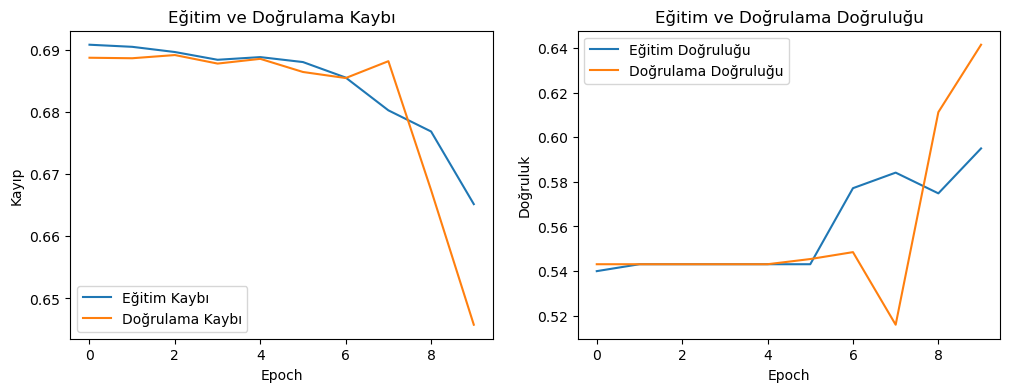

In [19]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, DepthwiseConv2D, Activation, GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model

def MobileNetV3Small(input_shape=(64, 64, 3), num_classes=2):
    inputs = Input(shape=input_shape)

    # Convolutional Layer
    x = Conv2D(16, (3, 3), strides=(2, 2), padding='same')(inputs)
    x = Activation('relu')(x)

    # Depthwise Convolution
    x = DepthwiseConv2D((3, 3), strides=(2, 2), padding='same')(x)
    x = Activation('relu')(x)

    # Squeeze and Excitation
    x = tf.keras.layers.GlobalAveragePooling2D()(x)
    x = Dense(16, activation='relu')(x)
    x = Dense(32, activation='relu')(x)
    x = Dense(64, activation='relu')(x)

    # Fully Connected Layer
    x = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs, x)
    return model


model = MobileNetV3Small()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])



train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)


training_set = train_datagen.flow_from_directory('C:\\Users\\Lenovo\\Desktop\\CNNprojeleri\\HARDfakevsreal',
                                                 target_size=(64, 64),
                                                 batch_size=32,
                                                 class_mode='binary')

test_set = test_datagen.flow_from_directory('C:\\Users\\Lenovo\\Desktop\\CNNprojeleri\\HARDfakevsreal',
                                            target_size=(64, 64),
                                            batch_size=32,
                                            class_mode='binary')


history = model.fit(training_set, epochs=10, validation_data=test_set)


plt.figure(figsize=(12, 4))


plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Eğitim Kaybı')
plt.plot(history.history['val_loss'], label='Doğrulama Kaybı')
plt.title('Eğitim ve Doğrulama Kaybı')
plt.xlabel('Epoch')
plt.ylabel('Kayıp')
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Eğitim Doğruluğu')
plt.plot(history.history['val_accuracy'], label='Doğrulama Doğruluğu')
plt.title('Eğitim ve Doğrulama Doğruluğu')
plt.xlabel('Epoch')
plt.ylabel('Doğruluk')
plt.legend()

plt.show()